In [1]:
#Importation des librairies nécessaires au traitement du dataset
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os, sys
import lux
import seaborn as sns
plt.ion()

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, classification_report
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Récuperation du dataset

Tout d'abord, parlons du dataset en lui-même.<br>
<br>
Comme son nom l'indique, notre jeu de données traite de façon générale la maladie du parkinson chez des personnes selon des données sanitaires liées exclusivement à la voix.<br>
Ces constantes relevées sur 195 personnes nous permettront de prédire la maladie chez quelqu'un.

In [2]:
parkinson = pd.read_csv('parkinsons.csv') #import du data dans variable
test =  pd.read_csv('parkinsons.csv') #import du data dans variable
parkinson.head(10)   #affiche un echantillon du data avec le nbr de lignes et 
                   #colonnes

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [3]:
print("Voici les données du dataset :")
print(parkinson, "\n")

Voici les données du dataset :
               name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDV

In [4]:
#nb de lignes et de colonnes
parkinson.shape

(195, 24)

_Les données précédentes correspondent à certaines données sanitaires, voici une explication de chaque (en Anglais):_
<br>
**name** : ASCII subject name and recording number<br>
**MDVP:Fo(HZ)** : Average vocal fundamental frequency<br>
**MDVP:Fhi(HZ)** : Maximum vocal fundamental frequency<br>
**MDVP:Flo(HZ)** : Minimum vocal fundamental frequency<br>
**MDVP:Jitter(%); MDVP:Jitter(Abs); MDVP:RAP; MDVP:PPQ; Jitter:DDP** : Several measures of variation in fundamental frequency<br>
**MDVP:Shimmer; Shimmer:DDA** : Several measures of variation in amplitude<br>
**NHR; HNR** : Two measures of ratio of noise to tonal components in the voice<br>
**status** : Health status of the subject (1 = Parkinson, 0 = healthy)<br>
**RPDE; D2** : Two nonlinear dynamical complexity measures<br>
**DFA** ; Signal fractal scaling component<br>
**spread1; spread2; PPE** : Three nonlinear measures of fundamental frequency variation

In [5]:
parkinson.columns  #affiche les colonnes

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [6]:
parkinson.describe() #description du dataset avec les statistiques des variables

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [7]:
parkinson.info() #data type de chaque colonne

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [8]:
parkinson.isnull().sum() #verification des valeurs nulles manquantes

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [9]:
parkinson.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

# Exploration du dataset

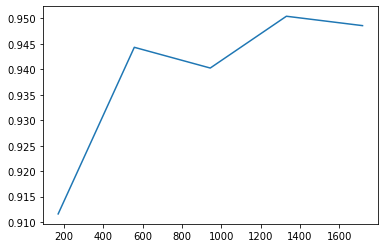

In [10]:
#Learning Curve
from sklearn.svm import SVR
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)
estimator = SVR(gamma=0.001)

train_sizes, train_scores, test_scores, fit_times,_ = learning_curve(estimator, X, y, cv=23, return_times=True)

plt.plot(train_sizes, np.mean(train_scores, axis=1))

In [11]:
#Valeurs uniques

for i in parkinson.columns:
    print("**",i,"**")
    print()
    print(set(parkinson[i].tolist()))
    print()

** name **

{'phon_R01_S35_1', 'phon_R01_S43_1', 'phon_R01_S04_3', 'phon_R01_S26_5', 'phon_R01_S35_5', 'phon_R01_S44_3', 'phon_R01_S49_3', 'phon_R01_S01_6', 'phon_R01_S10_4', 'phon_R01_S50_2', 'phon_R01_S26_3', 'phon_R01_S16_1', 'phon_R01_S26_2', 'phon_R01_S37_4', 'phon_R01_S22_3', 'phon_R01_S19_3', 'phon_R01_S37_3', 'phon_R01_S05_3', 'phon_R01_S31_6', 'phon_R01_S37_6', 'phon_R01_S08_5', 'phon_R01_S18_5', 'phon_R01_S08_3', 'phon_R01_S39_5', 'phon_R01_S18_1', 'phon_R01_S32_1', 'phon_R01_S06_2', 'phon_R01_S02_4', 'phon_R01_S13_4', 'phon_R01_S27_2', 'phon_R01_S50_3', 'phon_R01_S22_5', 'phon_R01_S32_4', 'phon_R01_S02_2', 'phon_R01_S34_3', 'phon_R01_S49_5', 'phon_R01_S01_4', 'phon_R01_S27_7', 'phon_R01_S01_5', 'phon_R01_S37_1', 'phon_R01_S32_3', 'phon_R01_S04_4', 'phon_R01_S17_1', 'phon_R01_S44_1', 'phon_R01_S06_6', 'phon_R01_S27_4', 'phon_R01_S18_2', 'phon_R01_S20_5', 'phon_R01_S50_5', 'phon_R01_S25_3', 'phon_R01_S34_5', 'phon_R01_S49_2', 'phon_R01_S25_6', 'phon_R01_S39_2', 'phon_R01_S43_6

In [12]:
temp=parkinson['status'].value_counts() #147 personnes ont la maladie et 48 
                                   #ne l'ont pas 
print(temp)

1    147
0     48
Name: status, dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)


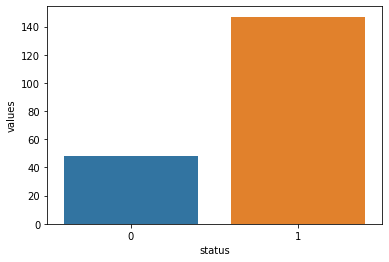

In [13]:
#représentation des données sous forme de diagramme

temp_parkinson = pd.DataFrame({'status' : temp.index, 'values' : temp.values})
print(sns.barplot(x= 'status', y= 'values', data = temp_parkinson))

_Ci-dessous nous allons visualiser la distribution (ou densité) de chaque donnée selon différents diagrammes_

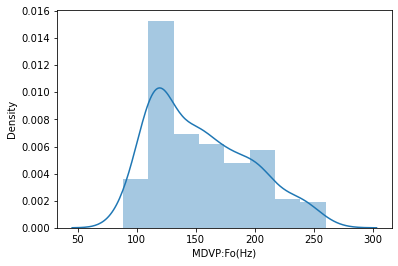

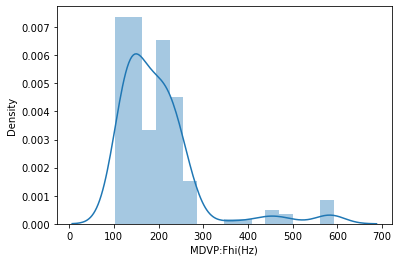

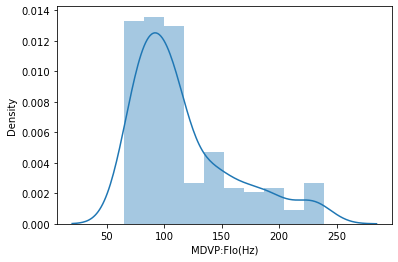

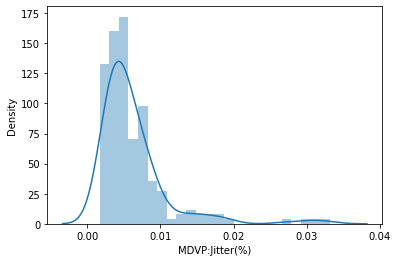

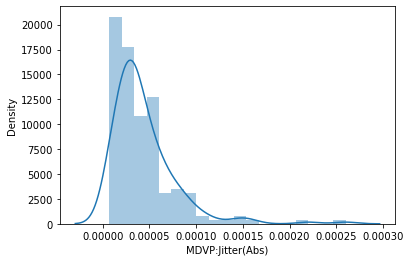

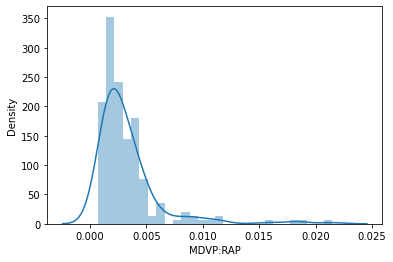

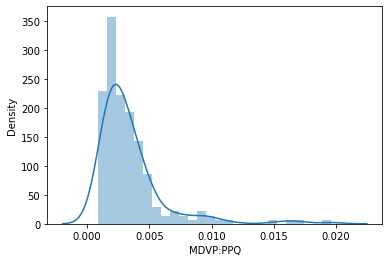

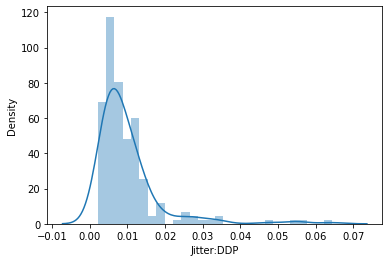

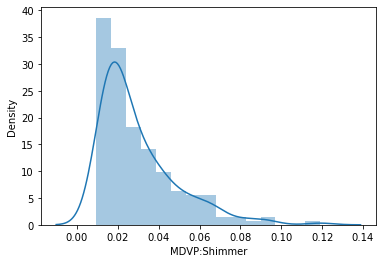

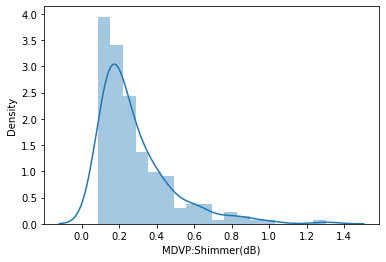

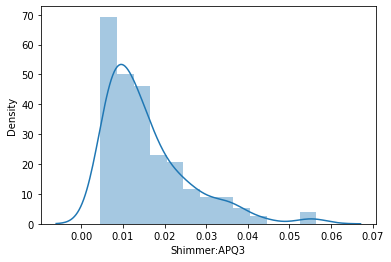

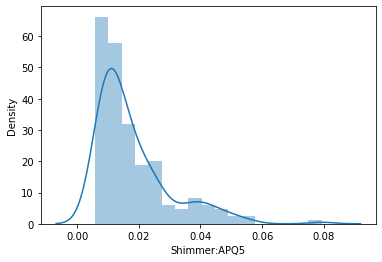

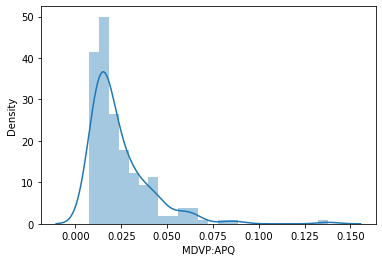

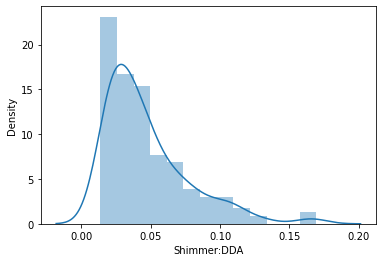

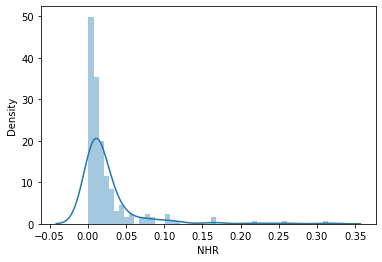

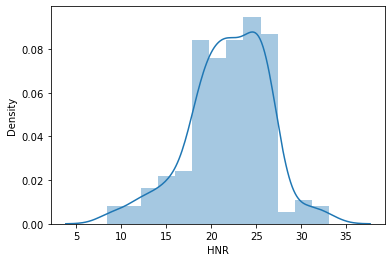

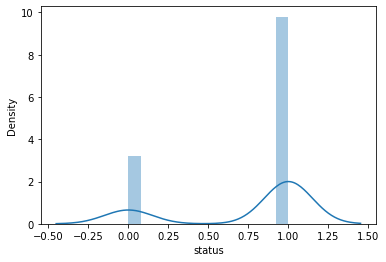

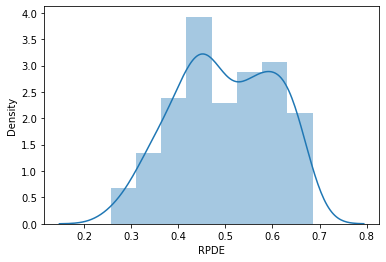

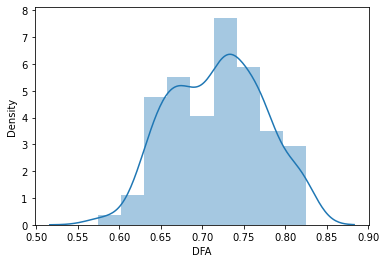

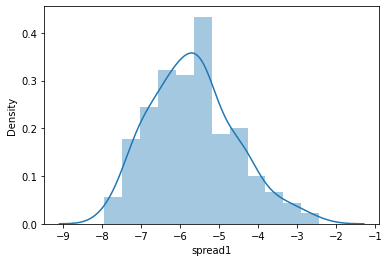

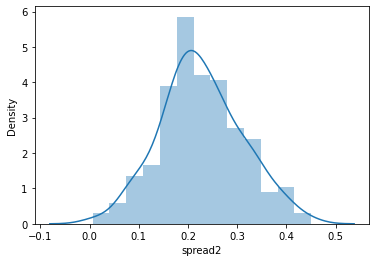

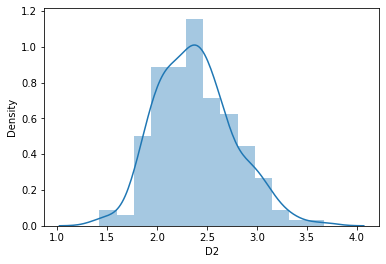

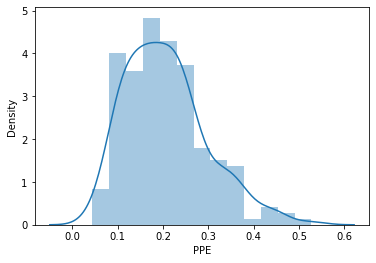

In [14]:
def distplots(col) :
    sns.distplot(parkinson[col])
    plt.show()
    
for i in list(parkinson.columns)[1:]:
    distplots(i)

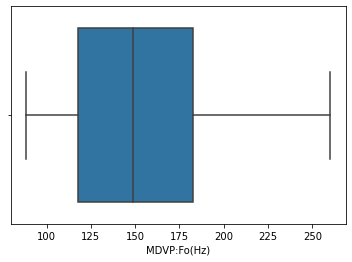

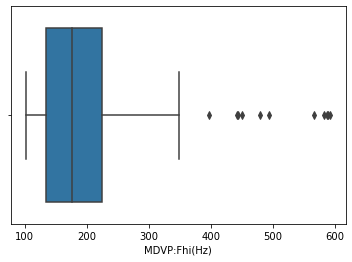

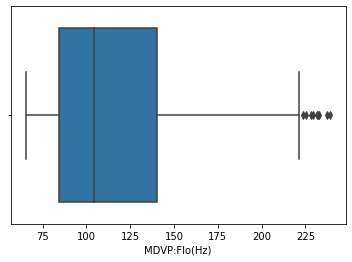

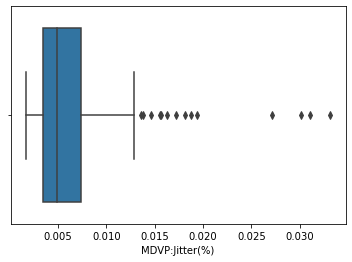

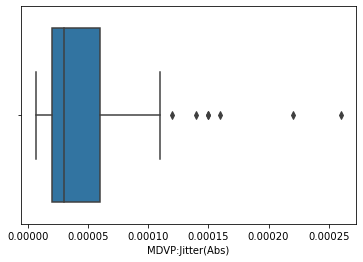

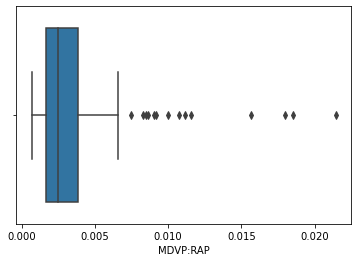

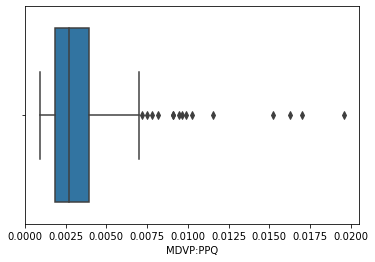

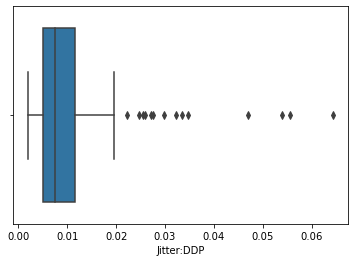

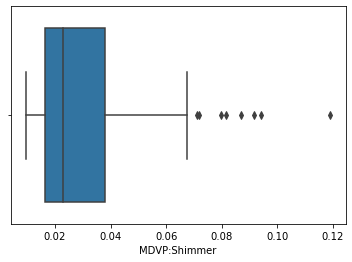

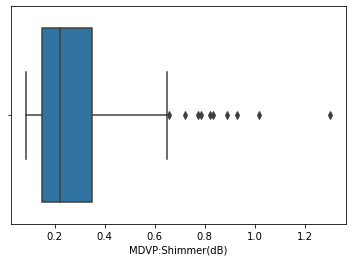

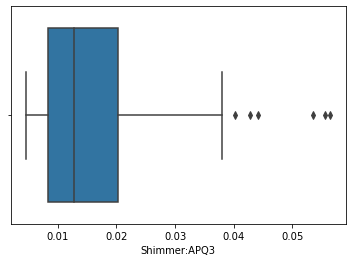

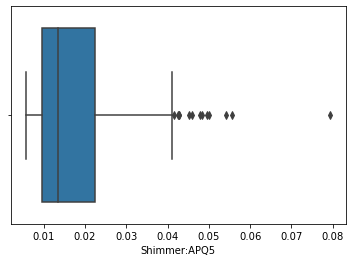

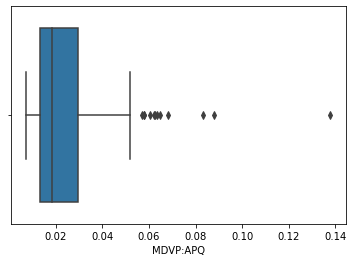

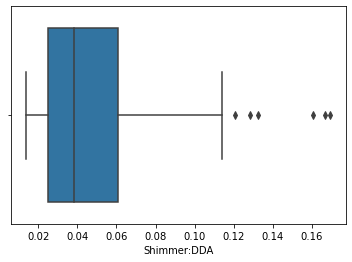

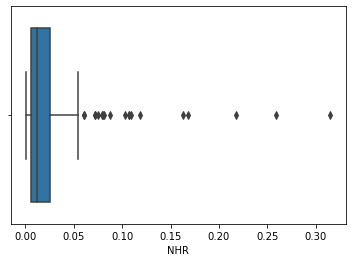

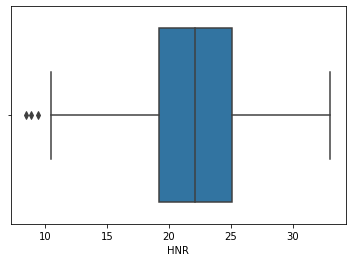

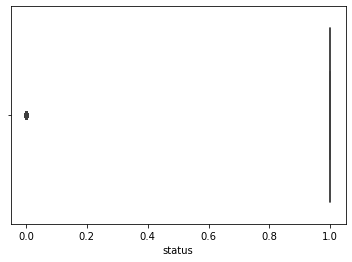

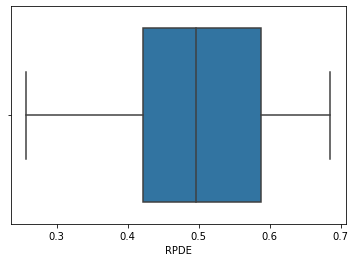

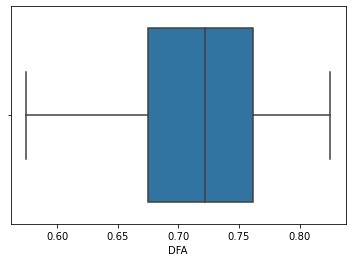

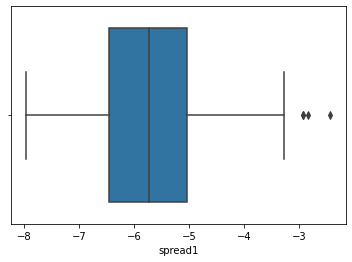

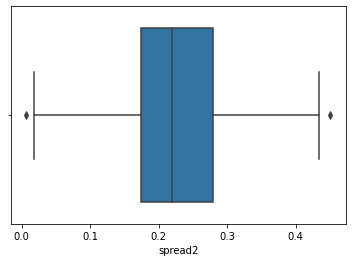

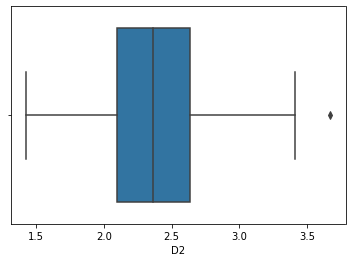

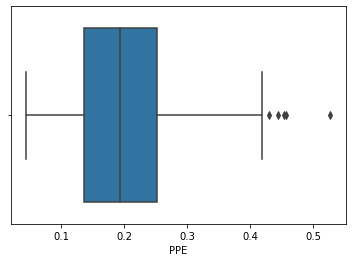

In [15]:
def boxplots(col):
    sns.boxplot(parkinson[col])
    plt.show()
    
for i in list (parkinson.columns)[1:]:
    boxplots(i)

In [16]:
pd.set_option("max_columns", None)

<a id="section_ID"></a>

In [17]:
parkinson.groupby("status").mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,0.009504,0.010509,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,0.017676,0.020285,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


_On remarque ici la moyenne des differentes données pour les personnes ayant la maladie et pour les personnes qui ne l'ont pas,_ _On peut voir que les personnes avec parkinson on en moyenne des valeurs plus grandes quelque soit la donnée._

Nous allons chercher, ici, les corrélations possibles

In [18]:
#corrélation "générale"
corr_dataset = parkinson.corr()
print("On affiche la corrélation correspondante :\n")
print(corr_dataset, "\n")

On affiche la corrélation correspondante :

                  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
MDVP:Fo(Hz)          1.000000      0.400985      0.596546       -0.118003   
MDVP:Fhi(Hz)         0.400985      1.000000      0.084951        0.102086   
MDVP:Flo(Hz)         0.596546      0.084951      1.000000       -0.139919   
MDVP:Jitter(%)      -0.118003      0.102086     -0.139919        1.000000   
MDVP:Jitter(Abs)    -0.382027     -0.029198     -0.277815        0.935714   
MDVP:RAP            -0.076194      0.097177     -0.100519        0.990276   
MDVP:PPQ            -0.112165      0.091126     -0.095828        0.974256   
Jitter:DDP          -0.076213      0.097150     -0.100488        0.990276   
MDVP:Shimmer        -0.098374      0.002281     -0.144543        0.769063   
MDVP:Shimmer(dB)    -0.073742      0.043465     -0.119089        0.804289   
Shimmer:APQ3        -0.094717     -0.003743     -0.150747        0.746625   
Shimmer:APQ5        -0.070682   

<AxesSubplot:>

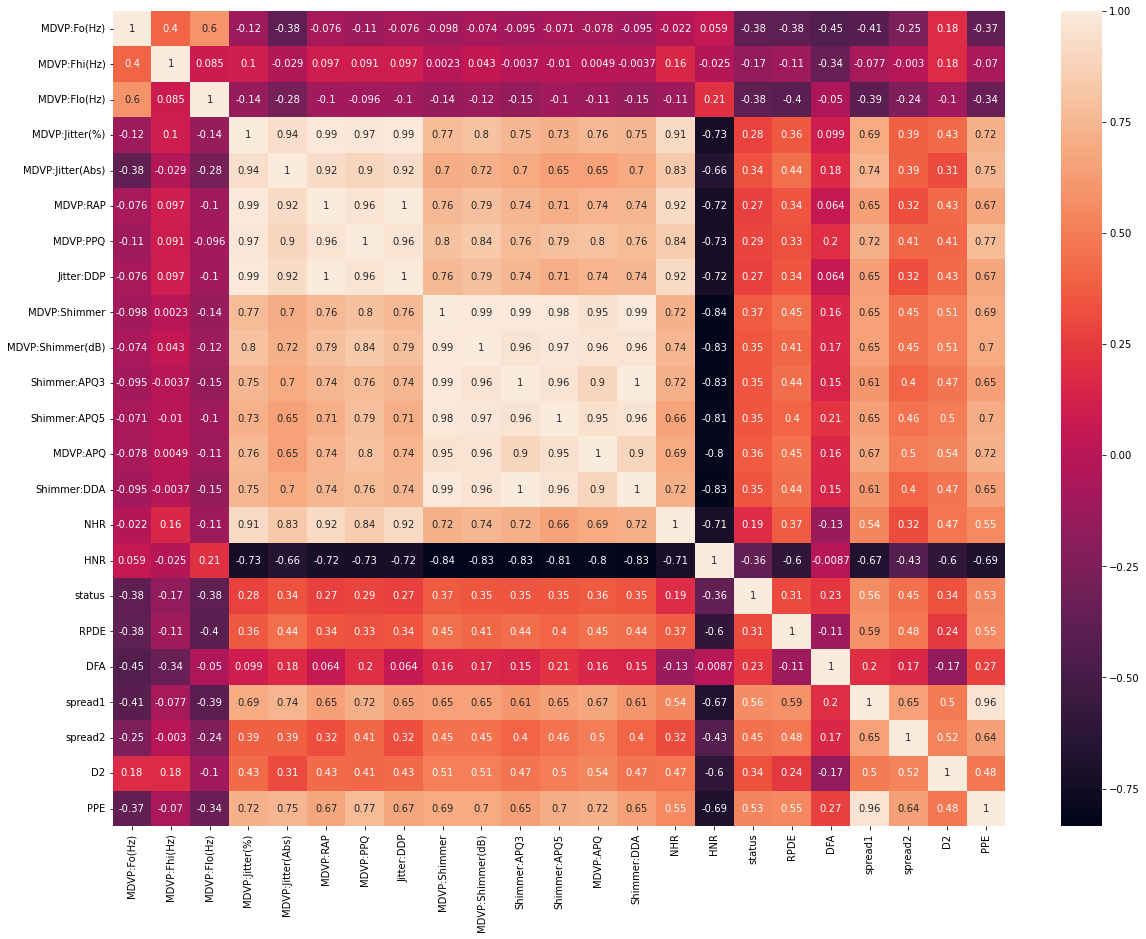

In [19]:
#heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr_dataset,annot=True)

_La corrélation "générale" nous permet d'avoir une vue trop vaste,_ _et qui oblige à passer trop de temps pour trouver une éventuelle corrélation par rapport à notre donnée principale status,_ _on applique ainsi la corrélation par rapport à status comme ci dessous._

In [20]:
#corrélation des données par rapport au status
frameparkinson = pd.DataFrame({'Voici la corrélation en fonction du status, à savoir le fait d être malade(1) ou pas(0) ': parkinson.corr()['status'].sort_values(ascending=False)})
frameparkinson

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

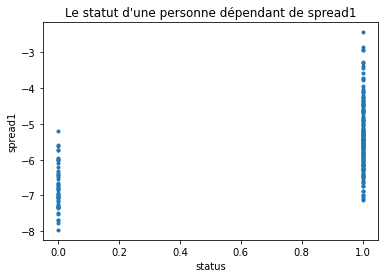

In [21]:
plt.plot(parkinson['status'], parkinson['spread1'], ".")
plt.xlabel("status")
plt.ylabel("spread1")
plt.title("Le statut d'une personne dépendant de spread1")
plt.show()

<div class="alert alert-block alert-info">
<b>Resultat:</b> Il n y a pas l'air d'avoir grande corrélation, en effet, nous remarquons que seulement peut de personne ne sont pas atteinte de parkinson au dessus de 225 Hz qui n'est pas assez pour montrer la corrélation. Par contre, en voit qu'en dessous de 115 Hz, beaucoup de personne ont parkinson.
</div>

_Essayons maintenant entre **PPE** et **status**_

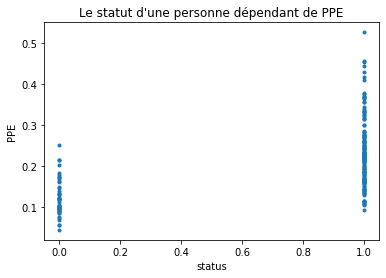

In [22]:
plt.plot(parkinson['status'], parkinson['PPE'], ".")
plt.xlabel("status")
plt.ylabel("PPE")
plt.title("Le statut d'une personne dépendant de PPE")
plt.show()

_Essayons maintenant entre **spread2** et **status**_

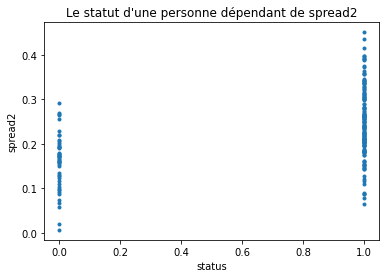

In [23]:
plt.plot(parkinson['status'], parkinson['spread2'], ".")
plt.xlabel("status")
plt.ylabel("spread2")
plt.title("Le statut d'une personne dépendant de spread2")
plt.show()

In [24]:
valeur_arrondi = parkinson['spread1'].round()

In [25]:
valeur_arrondi_ranger = valeur_arrondi.sort_values(
    axis = 0, 
    ascending = True, 
    inplace = False, 
    kind = 'quicksort', 
    na_position = 'last', 
    ignore_index = False, 
    key = None
)

In [26]:
#verifions les uniques fréquences du dataset
valeur_arrondi_ranger.unique()

array([-8., -7., -6., -5., -4., -3., -2.])

<div class="alert alert-block alert-success">
<b>Remarque:</b> Grace à l'affichage des valeurs uniques ont peut apercevoir qu'une corrélation est enfaite totalement possible entre status et spread1 
</div>

In [27]:
x = parkinson.drop(["status","name"],axis=1)
y = parkinson["status"]

print(Counter(y))

Counter({1: 147, 0: 48})


In [28]:
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x,y)
print(Counter(y_ros))

Counter({1: 147, 0: 147})


In [29]:
#Mise a lechelle

scaler = MinMaxScaler((-1,1))
x = scaler.fit_transform(x_ros)
y = y_ros

In [30]:
PCA = PCA(.95)
X_PCA = PCA.fit_transform(x)

print(x.shape)
print(X_PCA.shape)

(294, 22)
(294, 8)


In [31]:
#séparation du dataset en données d'apprentissage et données de test (20% seulement pour le test en raison)
x_train , x_test , y_train , y_test = train_test_split(X_PCA, y, test_size=0.2, random_state=7)

In [32]:
#Applying algorithm

list_met = []
list_accuracy = []

In [33]:
#Application de tous les algos

#Regression

classifier_lr = LogisticRegression(C=0.4,max_iter=1000,solver='liblinear')
lr = classifier_lr.fit(x_train,y_train)
#prediction
y_pred = classifier_lr.predict(x_test)
#precision
accuracy_LR = accuracy_score(y_test,y_pred)

#Decision tree
classifier_dt = DecisionTreeClassifier(random_state=14)
dt = classifier_dt.fit(x_train,y_train)
y_pred = classifier_dt.predict(x_test)
accuracy_DT= accuracy_score(y_test,y_pred)


#Random Forest criteria=information gain 
classifier_rfi = RandomForestClassifier(random_state=14)
rfi = classifier_rfi.fit(x_train, y_train)
y_pred_rfi = classifier_rfi.predict(x_test)
accuracy_RFI= accuracy_score(y_test, y_pred_rfi)

#Random Forest criteria=entropy
classifier_rfe = RandomForestClassifier(criterion='entropy')
rfe = classifier_rfe.fit(x_train, y_train)
y_pred_rfe = classifier_rfe.predict(x_test)
accuracy_RFE= accuracy_score(y_test, y_pred_rfe)


#SVC
model_svc = SVC(cache_size=100)
svc = model_svc.fit(x_train,y_train)
y_pred_svc = model_svc.predict(x_test)
accuracy_SVC= accuracy_score(y_test, y_pred_svc)

#KNN
model_knn = KNeighborsClassifier(n_neighbors = 3)
knn = model_knn.fit(x_train , y_train)
#prediction
pred_knn = model_knn.predict(x_test)
#précision
accuracy_KNN = accuracy_score(y_test , pred_knn)

In [34]:
#on liste les modèles, leurs noms et leurs précisions données

liste_noms = ['Regression' , 'Arbre de décision' , 'Random Forest par gain d information' , 'Random Forest par entropie' , 'Classification SVC' , 'Classification KNN']

liste_precisions = [accuracy_LR , accuracy_DT , accuracy_RFI , accuracy_RFE , accuracy_SVC , accuracy_KNN]

liste_modeles = [classifier_lr , classifier_dt , classifier_rfi , classifier_rfe , model_svc , model_knn]

                         Modèle utilisé  Précision du modèle
0                            Regression             0.796610
1                     Arbre de décision             0.932203
2  Random Forest par gain d information             0.983051
3            Random Forest par entropie             1.000000
4                    Classification SVC             0.881356
5                    Classification KNN             0.966102
AxesSubplot(0.125,0.125;0.775x0.755)


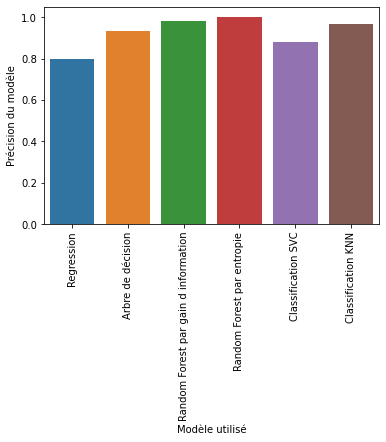

In [35]:
#visualisation des scores des différents modèles essayés sous forme de 'liste'

parkinson_accuracy = pd.DataFrame({'Modèle utilisé' : liste_noms , 'Précision du modèle' : liste_precisions})
print(parkinson_accuracy)

#représentation des résultats sous forme de diagramme
diag = sns.barplot(x = 'Modèle utilisé' , y = 'Précision du modèle' , data = parkinson_accuracy)
diag.set_xticklabels(diag.get_xticklabels() , rotation = 90)
print(diag)

In [36]:
#Initialisation de XGBClassifier qui est une méthode de classification et de boost utilisée dans les problèmes de Data Science modernes
model_xg = XGBClassifier()
model_xg.fit(x_train , y_train)

[04:04:08] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
#générer y_pred (valeurs prédites pour x_test) et calculer la précision du modèle en pourcentage

y_pred_xg = model_xg.predict(x_test)
print(accuracy_score(y_test , y_pred)*100)

93.22033898305084


In [38]:
#matrice de confusion

cm = confusion_matrix(y_test , model_xg.predict(x_test))

_Maintenant, nous allons appliquer le score F1 à notre modèle de Classification XGB._

In [39]:
#F1

f1_score(y_test , model_xg.predict(x_test) , average = 'binary')

0.9705882352941176

In [40]:
#Visualisation de la matrice de confusion générale

print(classification_report(y_test , model_xg.predict(x_test)))
print('Matrice de confusion : ')
print(cm)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.94      0.97        35

    accuracy                           0.97        59
   macro avg       0.96      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59

Matrice de confusion : 
[[24  0]
 [ 2 33]]


In [41]:
#Trouver le modele performant avec ROC

def plot_roc(model, x_test, y_test):
    probabilities = model.predict_proba(np.array(x_test))
    predictions = probabilities
    fpr, tpr, threshold = roc_curve(y_test, predictions[:,1])
    roc_auc = auc(fpr , tpr)
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0,1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

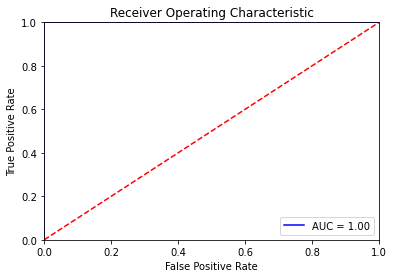

In [42]:
plot_roc(model_xg , x_test , y_test)


ROC appliquée à Regression avec PCA


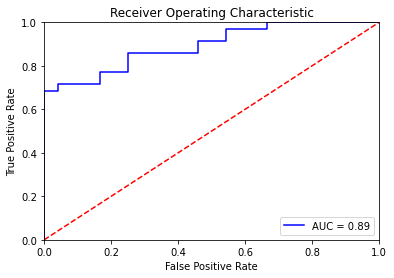



ROC appliquée à Arbre de décision avec PCA


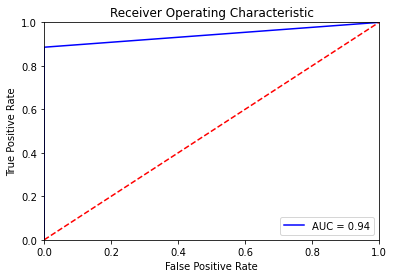



ROC appliquée à Random Forest par gain d information avec PCA


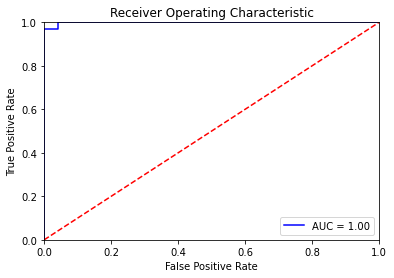



ROC appliquée à Random Forest par entropie avec PCA


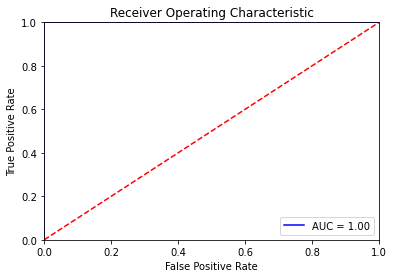



ROC appliquée à Classification SVC avec PCA
Erreur

ROC appliquée à Classification KNN avec PCA


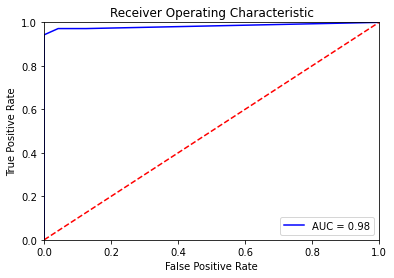

In [43]:
#ROC appliquée à chaque modèle

for i in range (0 , len(liste_modeles)):
    try :
        print()
        print("ROC appliquée à" , liste_noms[i] , "avec PCA")
        plot_roc(liste_modeles[i] , x_test , np.array(y_test))
        print()
    except :
        print("Erreur")

**Le modèle le plus efficace et adapté est Random Forest**